**COHORT** : grouping data to such variable (might be based on __*time, behaviour, size*__) to get insights on specific characteristic of each  over the assigned variable.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_excel('Superstore Indonesia.xls')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34196 entries, 0 to 34195
Data columns (total 24 columns):
Row               34196 non-null int64
Order ID          34196 non-null object
Order Date        34196 non-null datetime64[ns]
Ship Date         34196 non-null datetime64[ns]
Ship Mode         34196 non-null object
Customer ID       34196 non-null object
Customer Name     34196 non-null object
Segment           34196 non-null object
City              34196 non-null object
State             34196 non-null object
Global Area       34196 non-null object
Postal Code       6663 non-null float64
Market            34196 non-null object
Region            34196 non-null object
Product ID        34196 non-null object
Category          34196 non-null object
Sub-Category      34196 non-null object
Product Name      34196 non-null object
Sales             34196 non-null float64
Quantity          34196 non-null int64
Discount          34196 non-null float64
Profit            34196 non-null fl

,Row,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,MX-2014-143658,2014-10-02,2014-10-06,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,...,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.033,Medium
1,2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.449,Medium
2,4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.371,Medium
3,5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.787,Medium
4,7,MX-2013-134096,2013-09-27,2013-10-01,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,...,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0.0,21.32,4.108,Medium


- Pivot table
- Assigned cohort -> __rows__
- Cohort index -> __columns__
- Metrics -> __data__

### Time cohort

In [6]:
# Cohort -> 3 months period
# Metrics -> count of order id

q_ref = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}  #Cohort 1:Jan-Mar, 2:Apr-Jun, 3:Jul-Sep, 4:Oct-Dec
grouping = data.groupby('Customer ID').agg({'Order Date':min})
cohort_ref = {key:(value['Order Date'].year, q_ref[value['Order Date'].month]) for key,value in grouping.iterrows()}

In [9]:
data['Cohort'] = data.apply(lambda x: cohort_ref[x['Customer ID']], axis=1)
data['CohortIndex'] = data.apply(lambda x: (4*(x['Order Date'].year-x['Cohort'][0])+(q_ref[x['Order Date'].month]-x['Cohort'][1])+1), axis=1)

In [5]:
# del data['Cohort']
# del data['CohortIndex']

In [26]:
# print(data.info())
# data.sample(5)

In [15]:
cohort = data.groupby(['Cohort', 'CohortIndex'])['Customer ID'].apply(pd.Series.nunique)
cohort = cohort.reset_index().pivot(index='Cohort', columns='CohortIndex', values='Customer ID')
cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cohort,,,,,,,,,,,,,,,,
"(2011, 1)",446.0,219.0,233.0,278.0,182.0,259.0,282.0,296.0,211.0,294.0,314.0,320.0,241.0,318.0,336.0,354.0
"(2011, 2)",395.0,182.0,231.0,149.0,191.0,202.0,241.0,181.0,226.0,256.0,248.0,227.0,263.0,275.0,291.0,NaN
"(2011, 3)",266.0,127.0,93.0,121.0,137.0,141.0,117.0,134.0,161.0,164.0,129.0,167.0,169.0,179.0,NaN,NaN
"(2011, 4)",148.0,48.0,62.0,70.0,68.0,54.0,65.0,79.0,83.0,63.0,77.0,87.0,92.0,NaN,NaN,NaN
"(2012, 1)",60.0,16.0,24.0,21.0,14.0,12.0,28.0,20.0,20.0,20.0,23.0,31.0,NaN,NaN,NaN,NaN
"(2012, 2)",66.0,17.0,16.0,14.0,26.0,21.0,24.0,27.0,28.0,23.0,29.0,NaN,NaN,NaN,NaN,NaN
"(2012, 3)",64.0,20.0,13.0,14.0,19.0,23.0,17.0,26.0,26.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
"(2012, 4)",38.0,9.0,11.0,15.0,13.0,13.0,15.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2013, 1)",25.0,10.0,7.0,8.0,5.0,10.0,16.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# retention, compare matrics to first cohort
cohort_first = cohort.iloc[:,0]
retention = cohort.divide(cohort_first, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cohort,,,,,,,,,,,,,,,,
"(2011, 1)",1.0,0.491031,0.522422,0.623318,0.408072,0.580717,0.632287,0.663677,0.473094,0.659193,0.704036,0.717489,0.540359,0.713004,0.753363,0.793722
"(2011, 2)",1.0,0.460759,0.584810,0.377215,0.483544,0.511392,0.610127,0.458228,0.572152,0.648101,0.627848,0.574684,0.665823,0.696203,0.736709,NaN
"(2011, 3)",1.0,0.477444,0.349624,0.454887,0.515038,0.530075,0.439850,0.503759,0.605263,0.616541,0.484962,0.627820,0.635338,0.672932,NaN,NaN
"(2011, 4)",1.0,0.324324,0.418919,0.472973,0.459459,0.364865,0.439189,0.533784,0.560811,0.425676,0.520270,0.587838,0.621622,NaN,NaN,NaN
"(2012, 1)",1.0,0.266667,0.400000,0.350000,0.233333,0.200000,0.466667,0.333333,0.333333,0.333333,0.383333,0.516667,NaN,NaN,NaN,NaN
"(2012, 2)",1.0,0.257576,0.242424,0.212121,0.393939,0.318182,0.363636,0.409091,0.424242,0.348485,0.439394,NaN,NaN,NaN,NaN,NaN
"(2012, 3)",1.0,0.312500,0.203125,0.218750,0.296875,0.359375,0.265625,0.406250,0.406250,0.546875,NaN,NaN,NaN,NaN,NaN,NaN
"(2012, 4)",1.0,0.236842,0.289474,0.394737,0.342105,0.342105,0.394737,0.447368,0.421053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2013, 1)",1.0,0.400000,0.280000,0.320000,0.200000,0.400000,0.640000,0.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


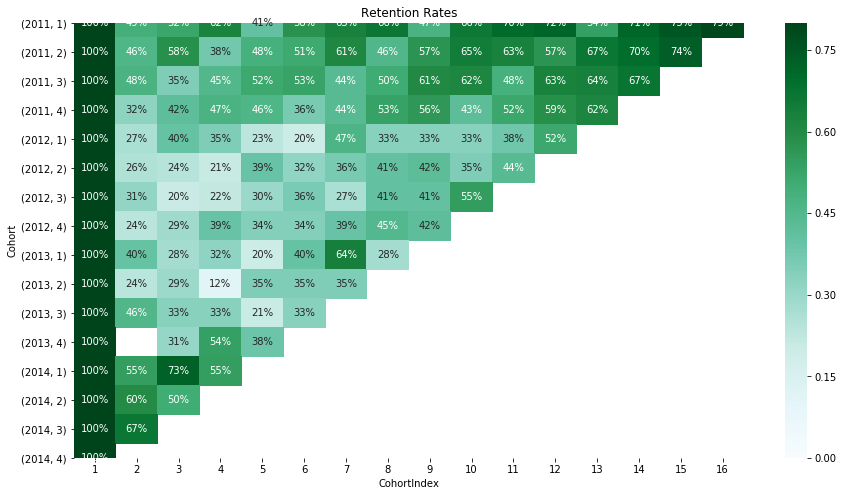

In [25]:
plt.figure(figsize=(15, 8))
plt.title('Retention Rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',
            vmin = 0.0, vmax = 0.8, cmap = 'BuGn')
plt.show()